In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sms-spam-collection-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [58]:
# Importing necessary libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [124]:
email_data = pd.read_csv('/content/spam.csv', encoding='latin-1')
email_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [125]:
email_data = email_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [126]:
email_data.columns = ['label', 'message']
email_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [127]:
print(f"the shape of dataset : {email_data.shape}")
email_data.info()

the shape of dataset : (5572, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [129]:
email_data.value_counts('label')

label
ham     4825
spam     747
Name: count, dtype: int64

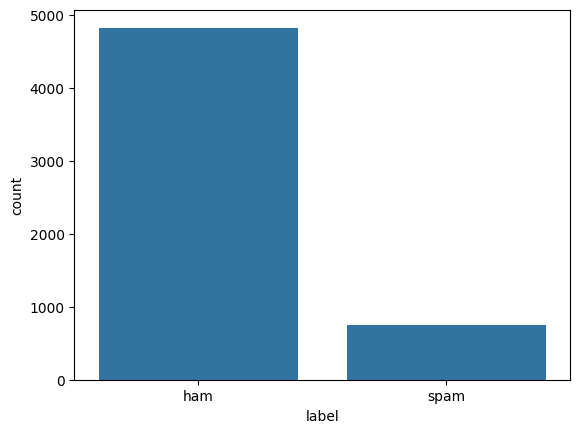

In [131]:
sns.countplot(x='label', data=email_data)
plt.show()


# Separate the data into X and y

In [133]:
X = email_data['message']
y = email_data['label']


In [134]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object


In [135]:
print(y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object


# Convert label columns into numarical data

In [167]:
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)

In [168]:
print(y)

[0 0 1 ... 0 0 0]


# Now convert the data in to training and testing part

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [170]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

4457
1115
4457
1115


# Clean the Data or Remove unnesessry words

In [171]:
def clean_email_body(body):
    body = re.sub(r'<[^>]+>', '', body)
    body = re.sub(r'\W', ' ', body)
    body = re.sub(r'\s+', ' ', body)
    return body.strip().lower()

# Clean the training and testing data
X_train = X_train.apply(clean_email_body)
X_test = X_test.apply(clean_email_body)

# Transform text data to TF-IDF features for classification.

In [172]:
tf_id = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_tf = tf_id.fit_transform(X_train)
X_test_tf = tf_id.transform(X_test)

In [173]:
print(X_train_tf)

  (0, 4518)	0.4658046386365619
  (0, 3208)	0.348722265231364
  (0, 7413)	0.348722265231364
  (0, 1704)	0.3431839629173582
  (0, 4414)	0.4528381701109944
  (0, 1369)	0.4658046386365619
  (1, 0)	0.2654936554684193
  (1, 1647)	0.3059746053542906
  (1, 6438)	0.2953742837684993
  (1, 4531)	0.3059746053542906
  (1, 418)	0.28715203556385105
  (1, 4290)	0.2953742837684993
  (1, 5003)	0.1937920260229529
  (1, 2659)	0.3059746053542906
  (1, 1531)	0.2015782058421696
  (1, 6294)	0.269833648032668
  (1, 3629)	0.2804339696184593
  (1, 3138)	0.3059746053542906
  (1, 1185)	0.26161139982801973
  (2, 2188)	0.5102109014477275
  (2, 5349)	0.5102109014477275
  (2, 1672)	0.35156722029872034
  (2, 5768)	0.3962151014046925
  (2, 3059)	0.44585171875646595
  (3, 5482)	0.4829129976175997
  :	:
  (4451, 5738)	0.3358090891373877
  (4451, 4684)	0.3478605253385091
  (4452, 3400)	0.4536077050510107
  (4452, 3421)	0.4833413012939851
  (4452, 1577)	0.3576443319642905
  (4452, 1779)	0.3311324953642251
  (4452, 5996)	0.3

# Function for Plot Confusion Matricx

In [174]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Train Models

In [175]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear')
}

Training Naive Bayes...
Accuracy of Naive Bayes: 0.9668161434977578
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Confusion Matrix:
[[965   0]
 [ 37 113]]
Confusion Matrix:


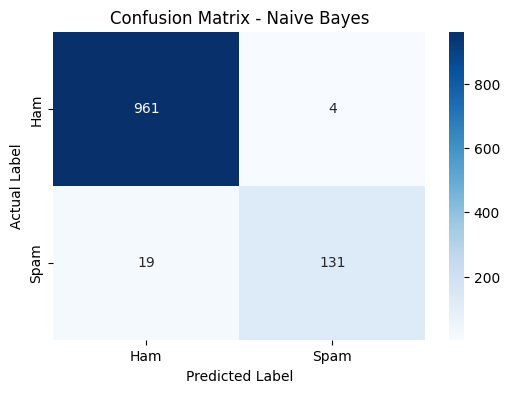

Training Logistic Regression...
Accuracy of Logistic Regression: 0.9524663677130045
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Confusion Matrix:
[[962   3]
 [ 50 100]]
Confusion Matrix:


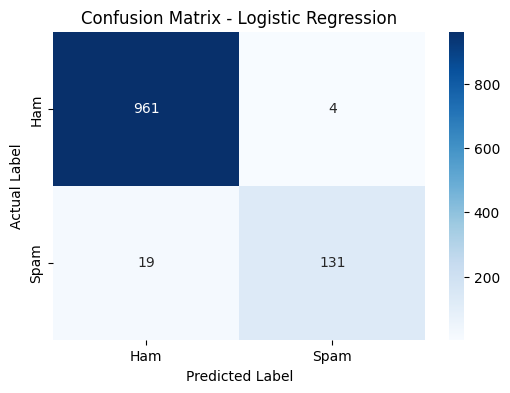

Training Support Vector Machine...
Accuracy of Support Vector Machine: 0.979372197309417
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[961   4]
 [ 19 131]]
Confusion Matrix:


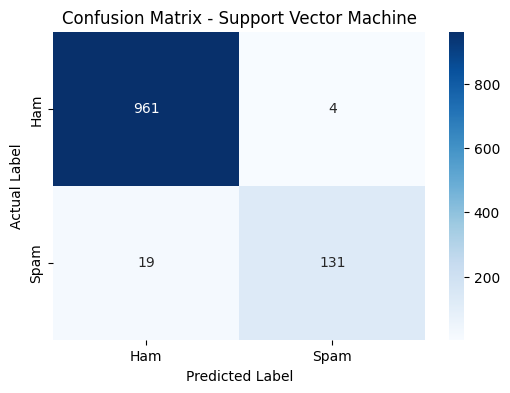

In [176]:
accuracy_scores = []
model_names = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tf, y_train)
    y_pred = model.predict(X_test_tf)
    accuracy = model.score(X_test_tf, y_test)
    accuracy_scores.append(accuracy)
    model_names.append(name)
    print(f"Accuracy of {name}: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Confusion Matrix:")
    plot_confusion_matrix(cm, name)

# Accuracy of different Models

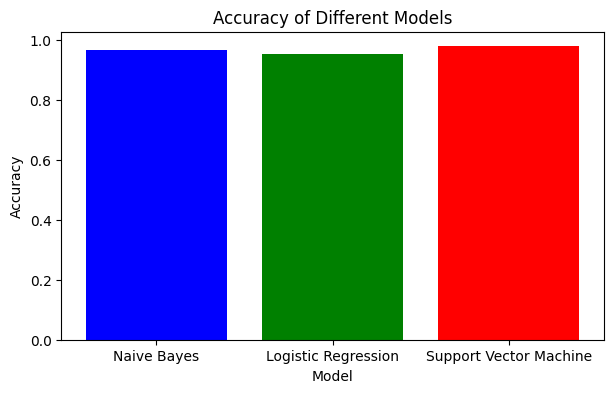

In [177]:
plt.figure(figsize=(7, 4))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

# Function for checking wheather email is Spam or Ham

In [178]:
def send_mail(mail):
  extract_mail=tf_id.transform(mail)
  prediction=model.predict(extract_mail.toarray())
  return prediction

In [182]:
input_mail=["Romantic Paris. 2 nights, 2 flights from £79 Book now 4 next year. Call 08704439680Ts&Cs apply."]
prediction=send_mail(input_mail)
if prediction==1:
  print("the email is spam")
else:
  print("the email is ham")

the email is spam
